In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pandas import Timestamp
import seaborn as sns
import datetime as dt

In [4]:
#load data from pkl files
def data_load(code = 0):
    return pd.read_pickle('event_'+str(code)+'_data.pkl')
#load data from all dataset
data_modified = pd.read_csv('dataset_modified.csv')

In [5]:
#each day each activity
def train_data_prepare(code = 0):
    data = data_load(code)
    text = data['location'].iloc[0]
    #event list
    begin_point = data['BE'].str.contains('begin').fillna(False)
    end_point   = data['BE'].str.contains('end').fillna(False)

    index_begin         = data.loc[begin_point].index
    index_end           = data.loc[end_point].index
    only_event_begin    = data.loc[index_begin]
    only_event_end      = data.loc[index_end]

    event_begin         = only_event_begin.loc[data['location'].str.contains(data.head(1)['location'].values[0]).fillna(False)]
    event_end           = only_event_end.loc[data['location'].str.contains(data.head(1)['location'].values[0]).fillna(False)]

    return event_begin,event_end,text

In [78]:
df = []
event = []
for i in range(13):
    code = i
    b,e,data_t = train_data_prepare(code)

    df_event = pd.DataFrame([b['datetime'].values,e['datetime'].values])
    df_event = df_event.transpose()
    df_event.columns = ['Start','End']
    df_len = len(df_event.index)
    df_event['Task'] = [data_t] * df_len
    df.append(df_event)
    event.append(data_t)
    pass
df = pd.concat(df)

In [154]:
df['Hours'] = ( df['End'].values - df['Start'].values )#/ np.timedelta64(3600, 's')
df

,Start,End,Task,Hours
0,2009-02-02 07:15:17,2009-02-02 07:21:04,R1_Bed_to_Toilet,0 days 00:05:47
1,2009-02-03 07:29:34,2009-02-03 07:35:48,R1_Bed_to_Toilet,0 days 00:06:14
2,2009-02-04 07:26:00,2009-02-04 07:40:03,R1_Bed_to_Toilet,0 days 00:14:03
3,2009-02-05 06:51:44,2009-02-05 07:12:46,R1_Bed_to_Toilet,0 days 00:21:02
4,2009-02-06 07:33:50,2009-02-06 07:53:46,R1_Bed_to_Toilet,0 days 00:19:56
...,...,...,...,...
4,2009-03-10 19:41:14,2009-03-10 22:41:16,Study,0 days 03:00:02
5,2009-03-11 19:39:57,2009-03-11 22:09:45,Study,0 days 02:29:48
6,2009-03-23 20:35:02,2009-03-23 22:23:05,Study,0 days 01:48:03
7,2009-03-24 08:24:15,2009-03-24 08:36:44,Study,0 days 00:12:29


In [155]:
list_all = []
for i in range(13):
    code = i

    df_temp = df.loc[df['Task'].str.contains(event[code])]

    list = []
    for i in range(len(df_temp['Start'].values)):
        list.append((df_temp['Start'].values[i],df_temp['Hours'].values[i]))
        pass
    list_all.append(list)
    pass

In [167]:
color_list = ['royalblue','lightsteelblue','turquoise','aquamarine','lightblue','darkcyan','dodgerblue','mediumaquamarine','cornflowerblue','lightseagreen','deepskyblue','teal','steelblue']

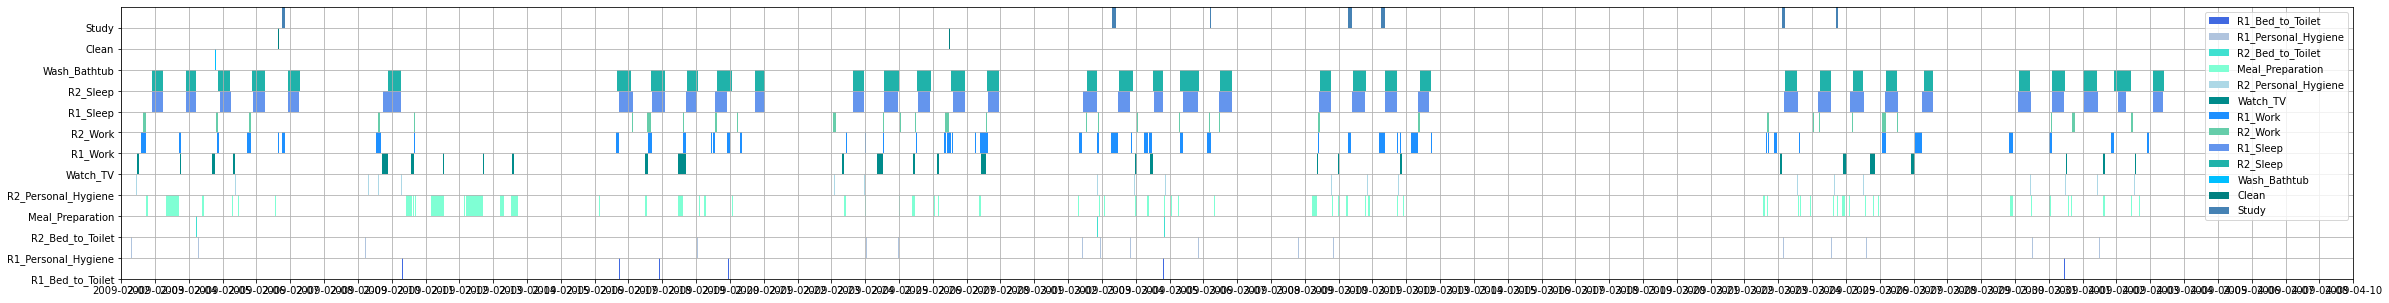

In [182]:
f, ax = plt.subplots(figsize=(40, 5))
for i in range(13):
    ax.broken_barh(list_all[i], (i, 1), facecolors=color_list[i],label = event[i])
    pass
ax.grid(True)
ax.set_ylim(0,13)
ax.set_xlim(dt.datetime(2009,2,2,0,0,0),dt.datetime(2009,4,10,0,0,0))

datelist = pd.date_range(dt.datetime(2009,2,2,0,0,0),dt.datetime(2009,4,10,0,0,0), periods=67).tolist()
ax.set_xticks(datelist)
#ax.set_xticklabels([])

ax.set_yticks(range(13))
ax.set_yticklabels(event)

ax.legend()

In [183]:
f.savefig('timeline.svg')

<AxesSubplot:xlabel='Task', ylabel='Hours'>

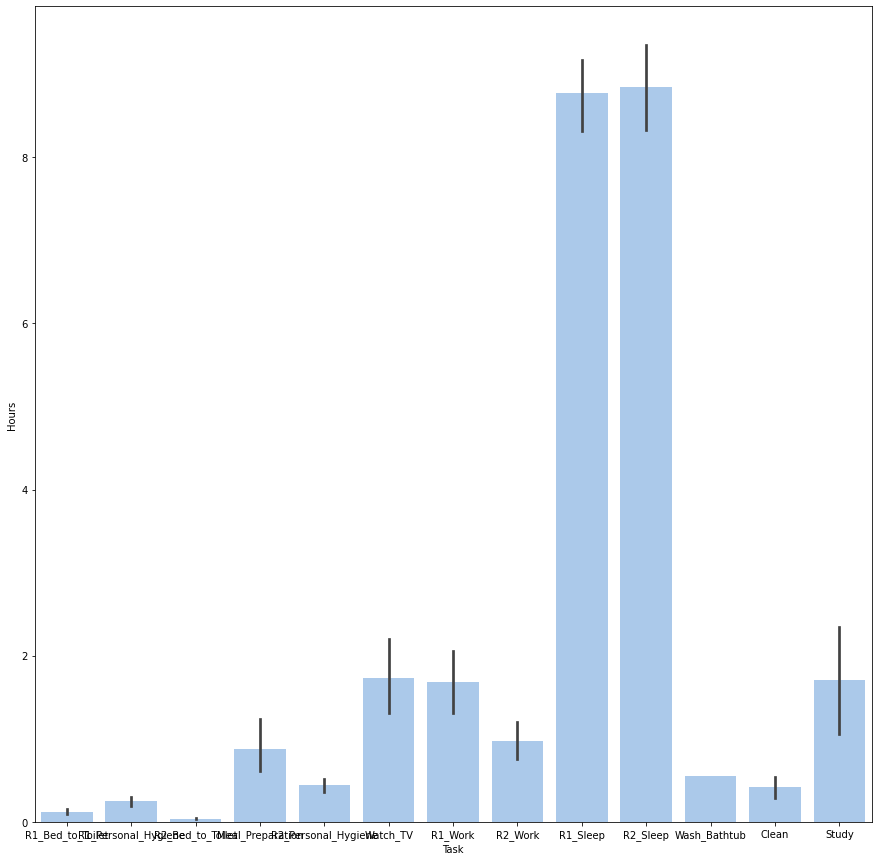

In [65]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Task", y="Hours", data=df,
            label="Total", color="b")